# Branton - Final Project: Regression Analysis
**Author:** Branton Dawson  
**Date:** November 24, 2025  
**Objective:** Medical Cost Personal Datasets - Predict insurance charges based on age, BMI or smoking status

**We will predict insurance cost using features on the Medical Cost dataset**
- DATASET:  Miri Choi - https://www.kaggle.com/datasets/mirichoi0218/insurance 

## Section 1.  Import and Inspect the Data

In [1]:
# all imports at the top, organized
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 1.1 Load and Inspect the data

In [2]:
# Load insurance dataset
data = pd.read_csv('../data/insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and display summary statistics.

In [3]:
# Check data types and info
data.info()
print()
# Check for missing values and display summary statistics
missing_values = data.isnull().sum()
missing_values
print(missing_values)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Reflection 1: What do you notice about the dataset? Are there any data issues?
- There are 7 features with no missing values
- The Dataset has 1338 records, which is a reasonable size for regression
- There are 4 numeric features and 3 text objects
- The min age is 18 with a max of 64
- Minimum BMI is 15.96 and a max of 53.13
- Min number of children is 0 and max of 5
- The minumum charge was $1,121.97 and max was $63,770.43

## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions 

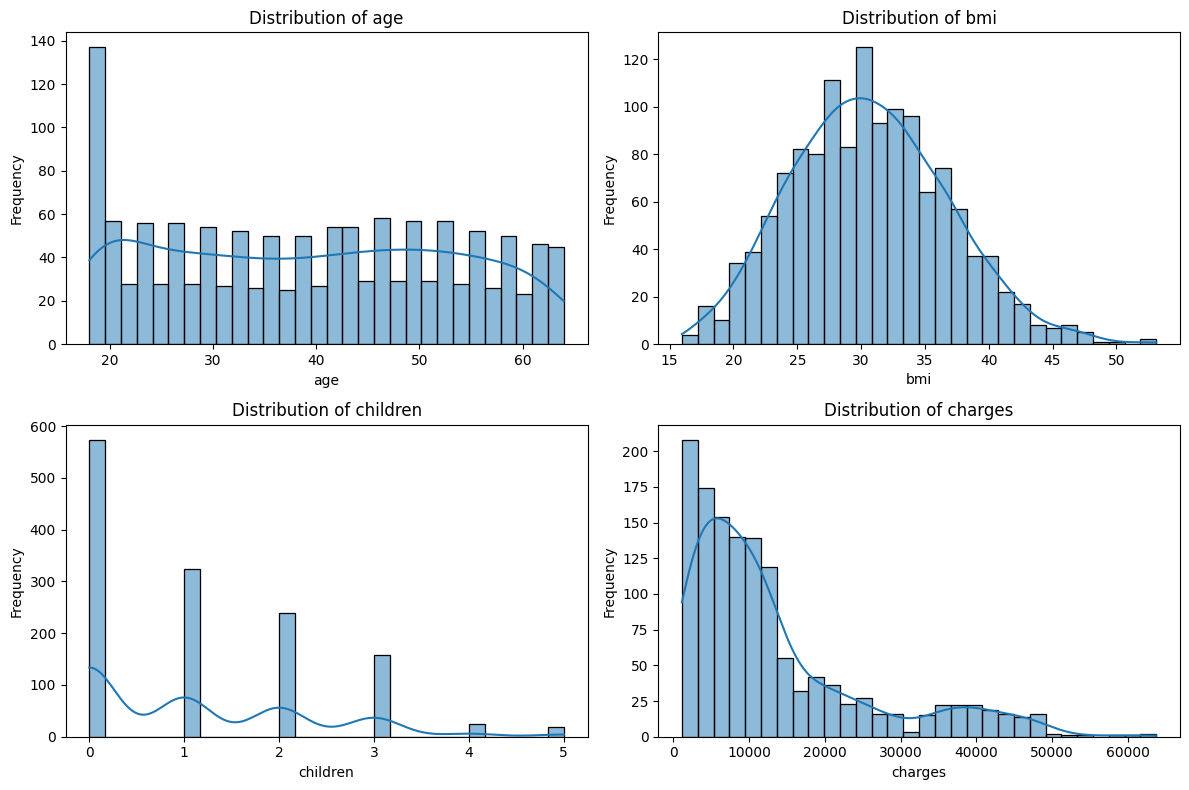

In [4]:
# Histograms of numerical features with side-by-side comparison
numerical_features = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

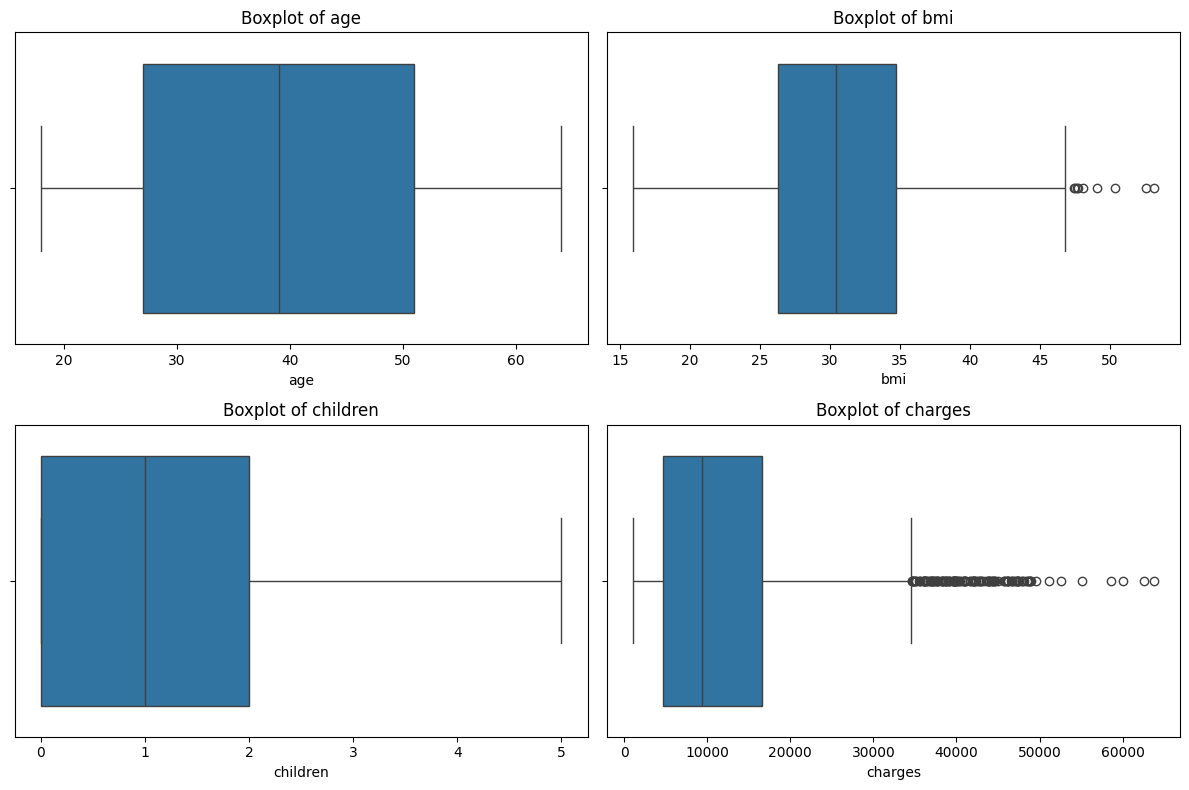

In [5]:
# Create boxplots for numerical features to identify outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

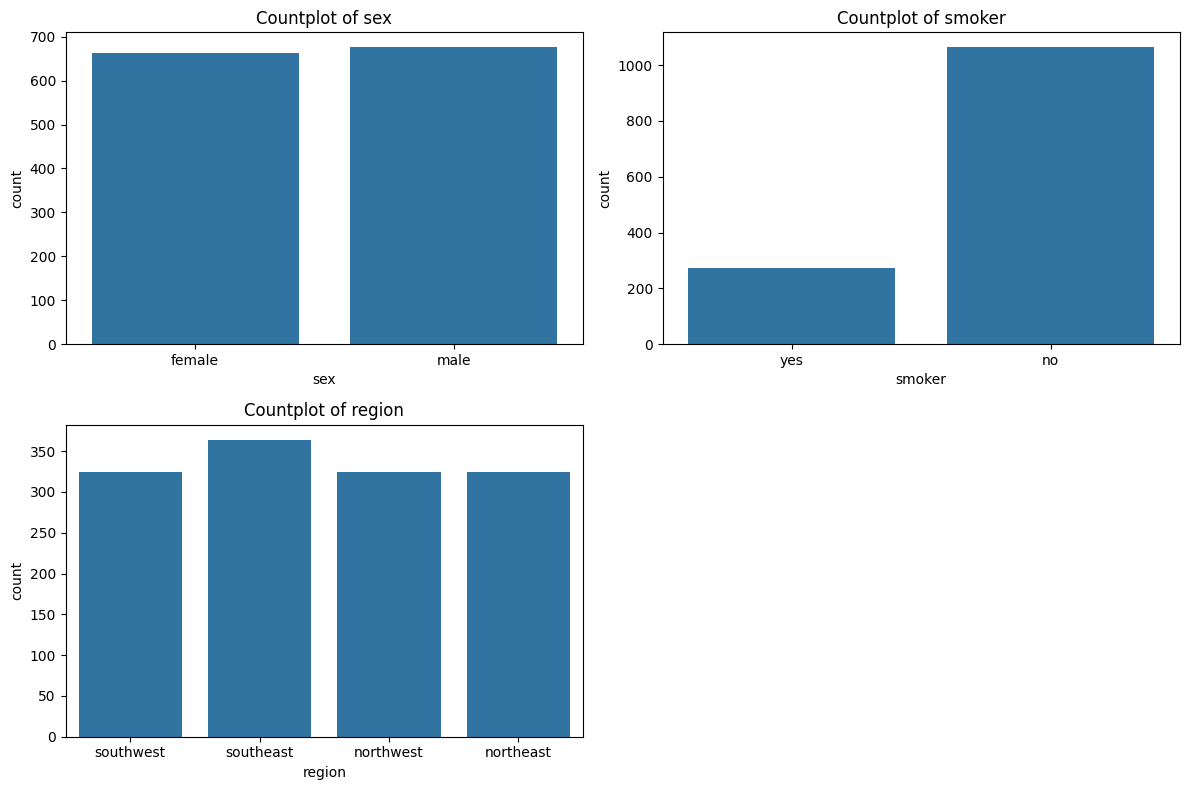

In [6]:
# Create countplots for categorical features
categorical_features = ['sex', 'smoker', 'region']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=data[feature])
    plt.title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()

In [7]:
# Statistical outlier detection using IQR method
print("OUTLIER ANALYSIS (using IQR method)")
print("=" * 60)

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]
    
    print(f"\n{feature.upper()}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
    
    if len(outliers) > 0:
        print(f"  Outlier range: {outliers.min():.2f} to {outliers.max():.2f}")

OUTLIER ANALYSIS (using IQR method)

AGE:
  Q1: 27.00, Q3: 51.00, IQR: 24.00
  Lower bound: -9.00, Upper bound: 87.00
  Number of outliers: 0 (0.0%)

BMI:
  Q1: 26.30, Q3: 34.69, IQR: 8.40
  Lower bound: 13.70, Upper bound: 47.29
  Number of outliers: 9 (0.7%)
  Outlier range: 47.41 to 53.13

CHILDREN:
  Q1: 0.00, Q3: 2.00, IQR: 2.00
  Lower bound: -3.00, Upper bound: 5.00
  Number of outliers: 0 (0.0%)

CHARGES:
  Q1: 4740.29, Q3: 16639.91, IQR: 11899.63
  Lower bound: -13109.15, Upper bound: 34489.35
  Number of outliers: 139 (10.4%)
  Outlier range: 34617.84 to 63770.43


### 2.2 Feature Engineering

Create any new features that might be helpful for the model from the existing data. This is not making up new data - it is providing existing data in a more helpful, concise way for modeling.

In [10]:
# Create age ranges, BMI, sex and smoker status categories
data['age_group'] = pd.cut(data['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])
data['sex_numerical'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)
data['smoker_status'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data.head(10)


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category,smoker_status,sex_numerical
0,19,female,27.900,0,yes,southwest,16884.92400,18-25,Overweight,1,0
1,18,male,33.770,1,no,southeast,1725.55230,18-25,Obese,0,1
2,28,male,33.000,3,no,southeast,4449.46200,26-35,Obese,0,1
3,33,male,22.705,0,no,northwest,21984.47061,26-35,Normal weight,0,1
4,32,male,28.880,0,no,northwest,3866.85520,26-35,Overweight,0,1
5,31,female,25.740,0,no,southeast,3756.62160,26-35,Overweight,0,0
6,46,female,33.440,1,no,southeast,8240.58960,46-55,Obese,0,0
7,37,female,27.740,3,no,northwest,7281.50560,36-45,Overweight,0,0
8,37,male,29.830,2,no,northeast,6406.41070,36-45,Overweight,0,1
9,60,female,25.840,0,no,northwest,28923.13692,56-65,Overweight,0,0


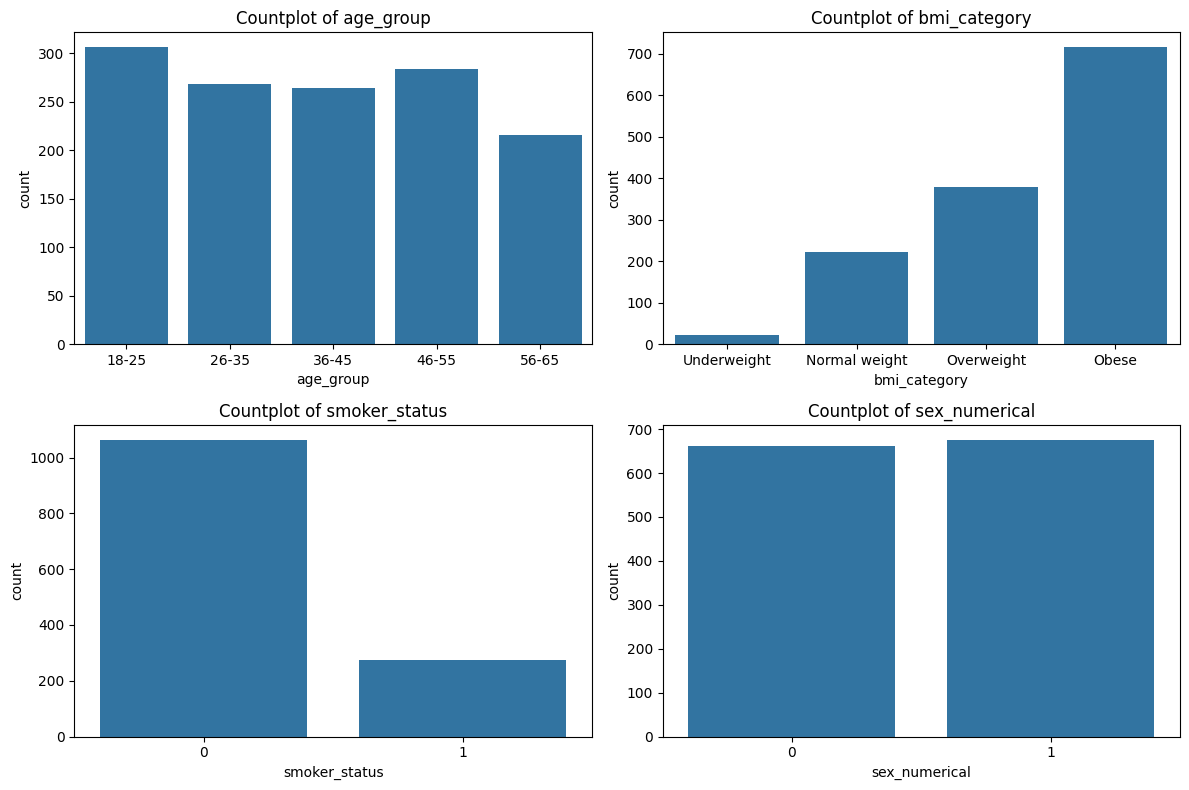

In [11]:
# Create histograms for age groups, BMI categories and smoker status tight layout
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['age_group', 'bmi_category', 'smoker_status', 'sex_numerical'], 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=data[feature])
    plt.title(f'Countplot of {feature}')

plt.tight_layout()
plt.show()

### Reflection 2: 
1. What patterns or anomalies do you see? Do any features stand out? 
   1. There are nearly 4 times as many non-smokers compared to smokers in the test data 
   2. There is a large number of the subject under the age of 20
   3. Those with 0 kids far out number the other number of children categories
   4. Mean Age is 39.2 and mean BMI is 30.7
   5. BMI and Charges both have some high values, but are most likely good values
2. What preprocessing steps were necessary to clean and improve the data? 
   1. There were no missing values 
   2. BMI and Charges had outliers on the high range, but that data was left alone
3. Did you create or modify any features to improve performance?
   1. Created age_range bins
   2. Created bmi_range bins
   3. Created smoker_status (1=yes, 0=no)
   4. Created sex_numerical category for sex (1=male, 0=female)

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

- Case 1. input feature: age_range  target: charges
- Case 2. input feature: bmi_range  target: charges
- Case 3. input feature: smoker_status  target: charges
- Case 4. input feature: sex_numerical  target: charges

In [ ]:
# Define X (features) and y (target) for different cases
# Case 1: age_group vs charges
X_age = pd.get_dummies(data['age_group'], drop_first=True)
y = data['charges']
# Case 2: bmi_category vs charges
X_bmi = pd.get_dummies(data['bmi_category'], drop_first=True)
y = data['charges']
# Case 3: smoker_status vs charges
X_smoker = pd.get_dummies(data['smoker_status'], drop_first=True)
y = data['charges']
# Case 4: sex_numerical vs charges
X_sex = pd.get_dummies(data['sex_numerical'], drop_first=True)
y = data['charges']

### Box plot of feature(s) by charges

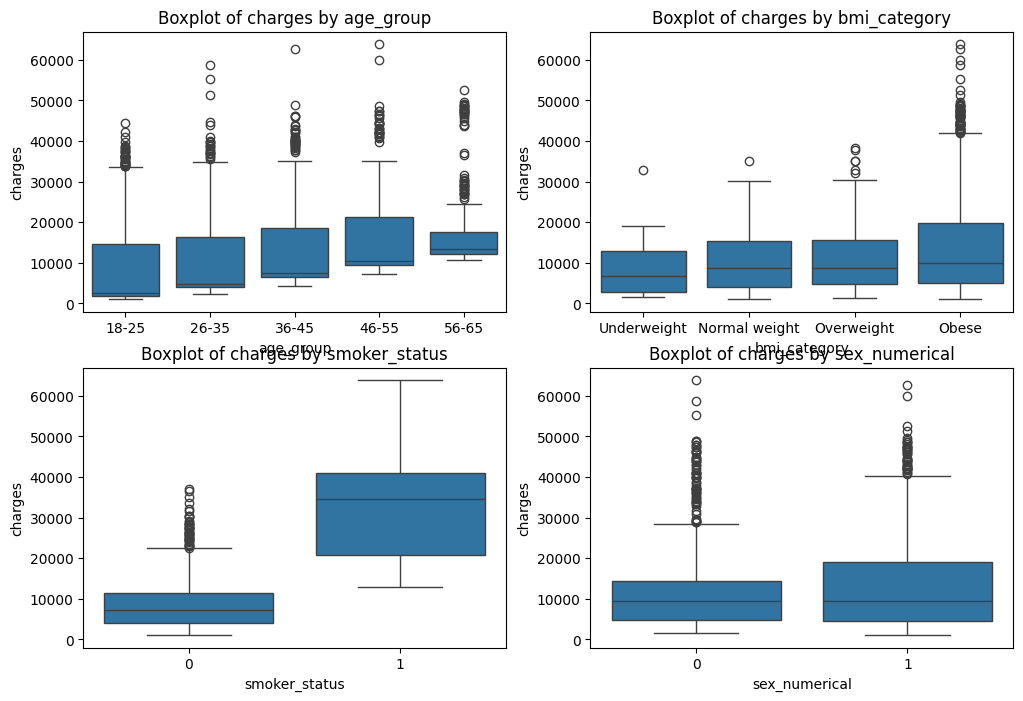

In [12]:
# Box plots for charges by categorical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['age_group', 'bmi_category', 'smoker_status', 'sex_numerical'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature], y=data['charges'])
    plt.title(f'Boxplot of charges by {feature}')

### Reflection 3:
1. **Why did you choose these features?**  
   - **Age group**: Older individuals typically have higher medical costs
   - **BMI category**: Higher BMI correlates with health complications and increased insurance charges
   - **Smoker status**: Smoking is a major risk factor that significantly increases medical costs
   - **Sex**: Gender can influence health risks and insurance pricing

2. **How might they impact predictions or accuracy?**
   - **Smoker status**: Expected to have the strongest impact - smokers typically pay more in medical costs
   - **BMI category**: Moderate impact - obesity-related conditions drive up charges
   - **Age group**: Moderate impact - older age groups accumulate more health issues
   - **Sex**: Weakest predictor - minimal correlation with charges in this dataset

## Section 4. Train a Regression Model (Linear Regression)
 
### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue)

### 4.2 Train model using Scikit-Learn model.fit() method

### 4.3 Evalulate performance, for example:

    Regression: R^2, MAE, RMSE (RMSE has been recently updated)
    Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
    Clustering: Inertia, Silhouette Score


### Reflection 4:
1. How well did the model perform? 
2. Any surprises in the results?

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression

### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

### ### 5.3 Compare performance of all models across the same performance metrics

### 5.4 Compare All Models

Create a summary table or printout comparing all models:

| Model | R² | RMSE | MAE |
|----------------------------------|-----|-----|-----|
| Linear Regression | 0.003 | 37.97 | 25.29 |
| Ridge | 0.003 | 37.97 | 25.29 |
| Polynomial Regression (degree 3) | 0.003 | 37.97 | 25.28 |
| Elastic Net | -0.003 | 38.10 | 25.30 |

### Reflection 5: 
1. Which models performed better? 
2. How does scaling impact results?

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

   
### 6.2 Discuss Challenges


### 6.3 Next Steps for Improvement

